### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

#Model
import statsmodels.formula.api as smf 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge 
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn import metrics
from sklearn.neighbors import KNeighborsRegressor


from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV,KFold

import warnings
warnings.filterwarnings("ignore")  #--to ignore warnings

### loading dataset

In [2]:
df = pd.read_csv('Energy_production -P440.csv')
df

,temperature,exhaust_vacuum,amb_pressure,r_humidity,energy_production
0,9.59,38.56,1017.01,60.10,481.30
1,12.04,42.34,1019.72,94.67,465.36
2,13.87,45.08,1024.42,81.69,465.48
3,13.72,54.30,1017.89,79.08,467.05
4,15.14,49.64,1023.78,75.00,463.58
...,...,...,...,...,...
9563,17.10,49.69,1005.53,81.82,457.32
9564,24.73,65.34,1015.42,52.80,446.92
9565,30.44,56.24,1005.19,56.24,429.34
9566,23.00,66.05,1020.61,80.29,421.57


### EDA Process

In [3]:
df.head()

,temperature,exhaust_vacuum,amb_pressure,r_humidity,energy_production
0,9.59,38.56,1017.01,60.10,481.30
1,12.04,42.34,1019.72,94.67,465.36
2,13.87,45.08,1024.42,81.69,465.48
3,13.72,54.30,1017.89,79.08,467.05
4,15.14,49.64,1023.78,75.00,463.58


In [4]:
df.tail()

,temperature,exhaust_vacuum,amb_pressure,r_humidity,energy_production
9563,17.10,49.69,1005.53,81.82,457.32
9564,24.73,65.34,1015.42,52.80,446.92
9565,30.44,56.24,1005.19,56.24,429.34
9566,23.00,66.05,1020.61,80.29,421.57
9567,17.75,49.25,1020.86,63.67,454.41


In [5]:
df.columns

Index(['temperature', 'exhaust_vacuum', 'amb_pressure', 'r_humidity',
       'energy_production'],
      dtype='object')

In [6]:
df.shape

(9568, 5)

In [7]:
df.describe()

,temperature,exhaust_vacuum,amb_pressure,r_humidity,energy_production
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


In [8]:
df.describe(include='all')

,temperature,exhaust_vacuum,amb_pressure,r_humidity,energy_production
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   temperature        9568 non-null   float64
 1   exhaust_vacuum     9568 non-null   float64
 2   amb_pressure       9568 non-null   float64
 3   r_humidity         9568 non-null   float64
 4   energy_production  9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


### Handing Missing Values

In [10]:
df.isnull()

,temperature,exhaust_vacuum,amb_pressure,r_humidity,energy_production
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
9563,False,False,False,False,False
9564,False,False,False,False,False
9565,False,False,False,False,False
9566,False,False,False,False,False


In [11]:
df.isnull().sum()

temperature          0
exhaust_vacuum       0
amb_pressure         0
r_humidity           0
energy_production    0
dtype: int64

### Handling Duplicates

In [12]:
df.duplicated().sum()

41

In [13]:
df.drop_duplicates(inplace=True)

In [14]:
df.duplicated().sum()

0

In [15]:
df

,temperature,exhaust_vacuum,amb_pressure,r_humidity,energy_production
0,9.59,38.56,1017.01,60.10,481.30
1,12.04,42.34,1019.72,94.67,465.36
2,13.87,45.08,1024.42,81.69,465.48
3,13.72,54.30,1017.89,79.08,467.05
4,15.14,49.64,1023.78,75.00,463.58
...,...,...,...,...,...
9563,17.10,49.69,1005.53,81.82,457.32
9564,24.73,65.34,1015.42,52.80,446.92
9565,30.44,56.24,1005.19,56.24,429.34
9566,23.00,66.05,1020.61,80.29,421.57


In [16]:
df.shape

(9527, 5)

### Visualizations

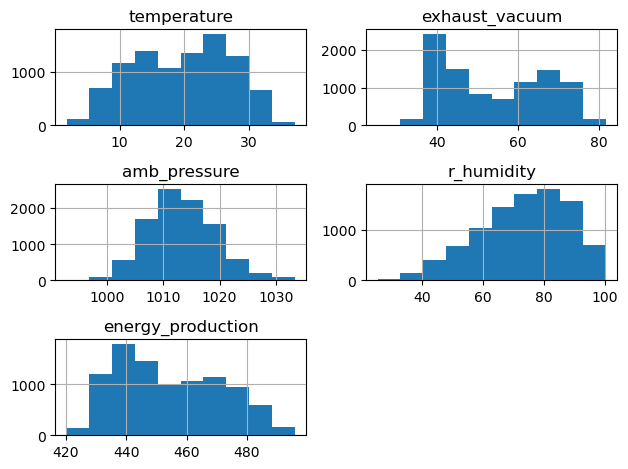

In [17]:
df.hist()
plt.tight_layout()

<Axes: >

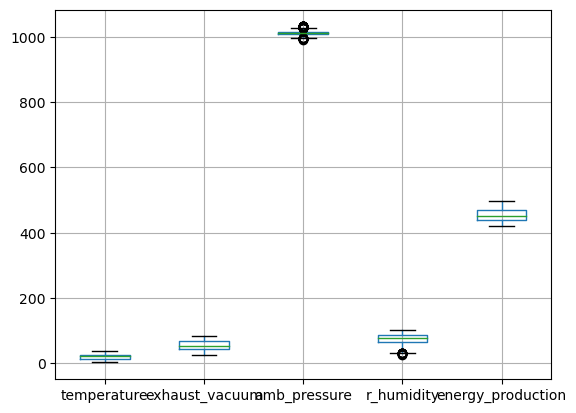

In [18]:
df.boxplot()

#### removing outliers

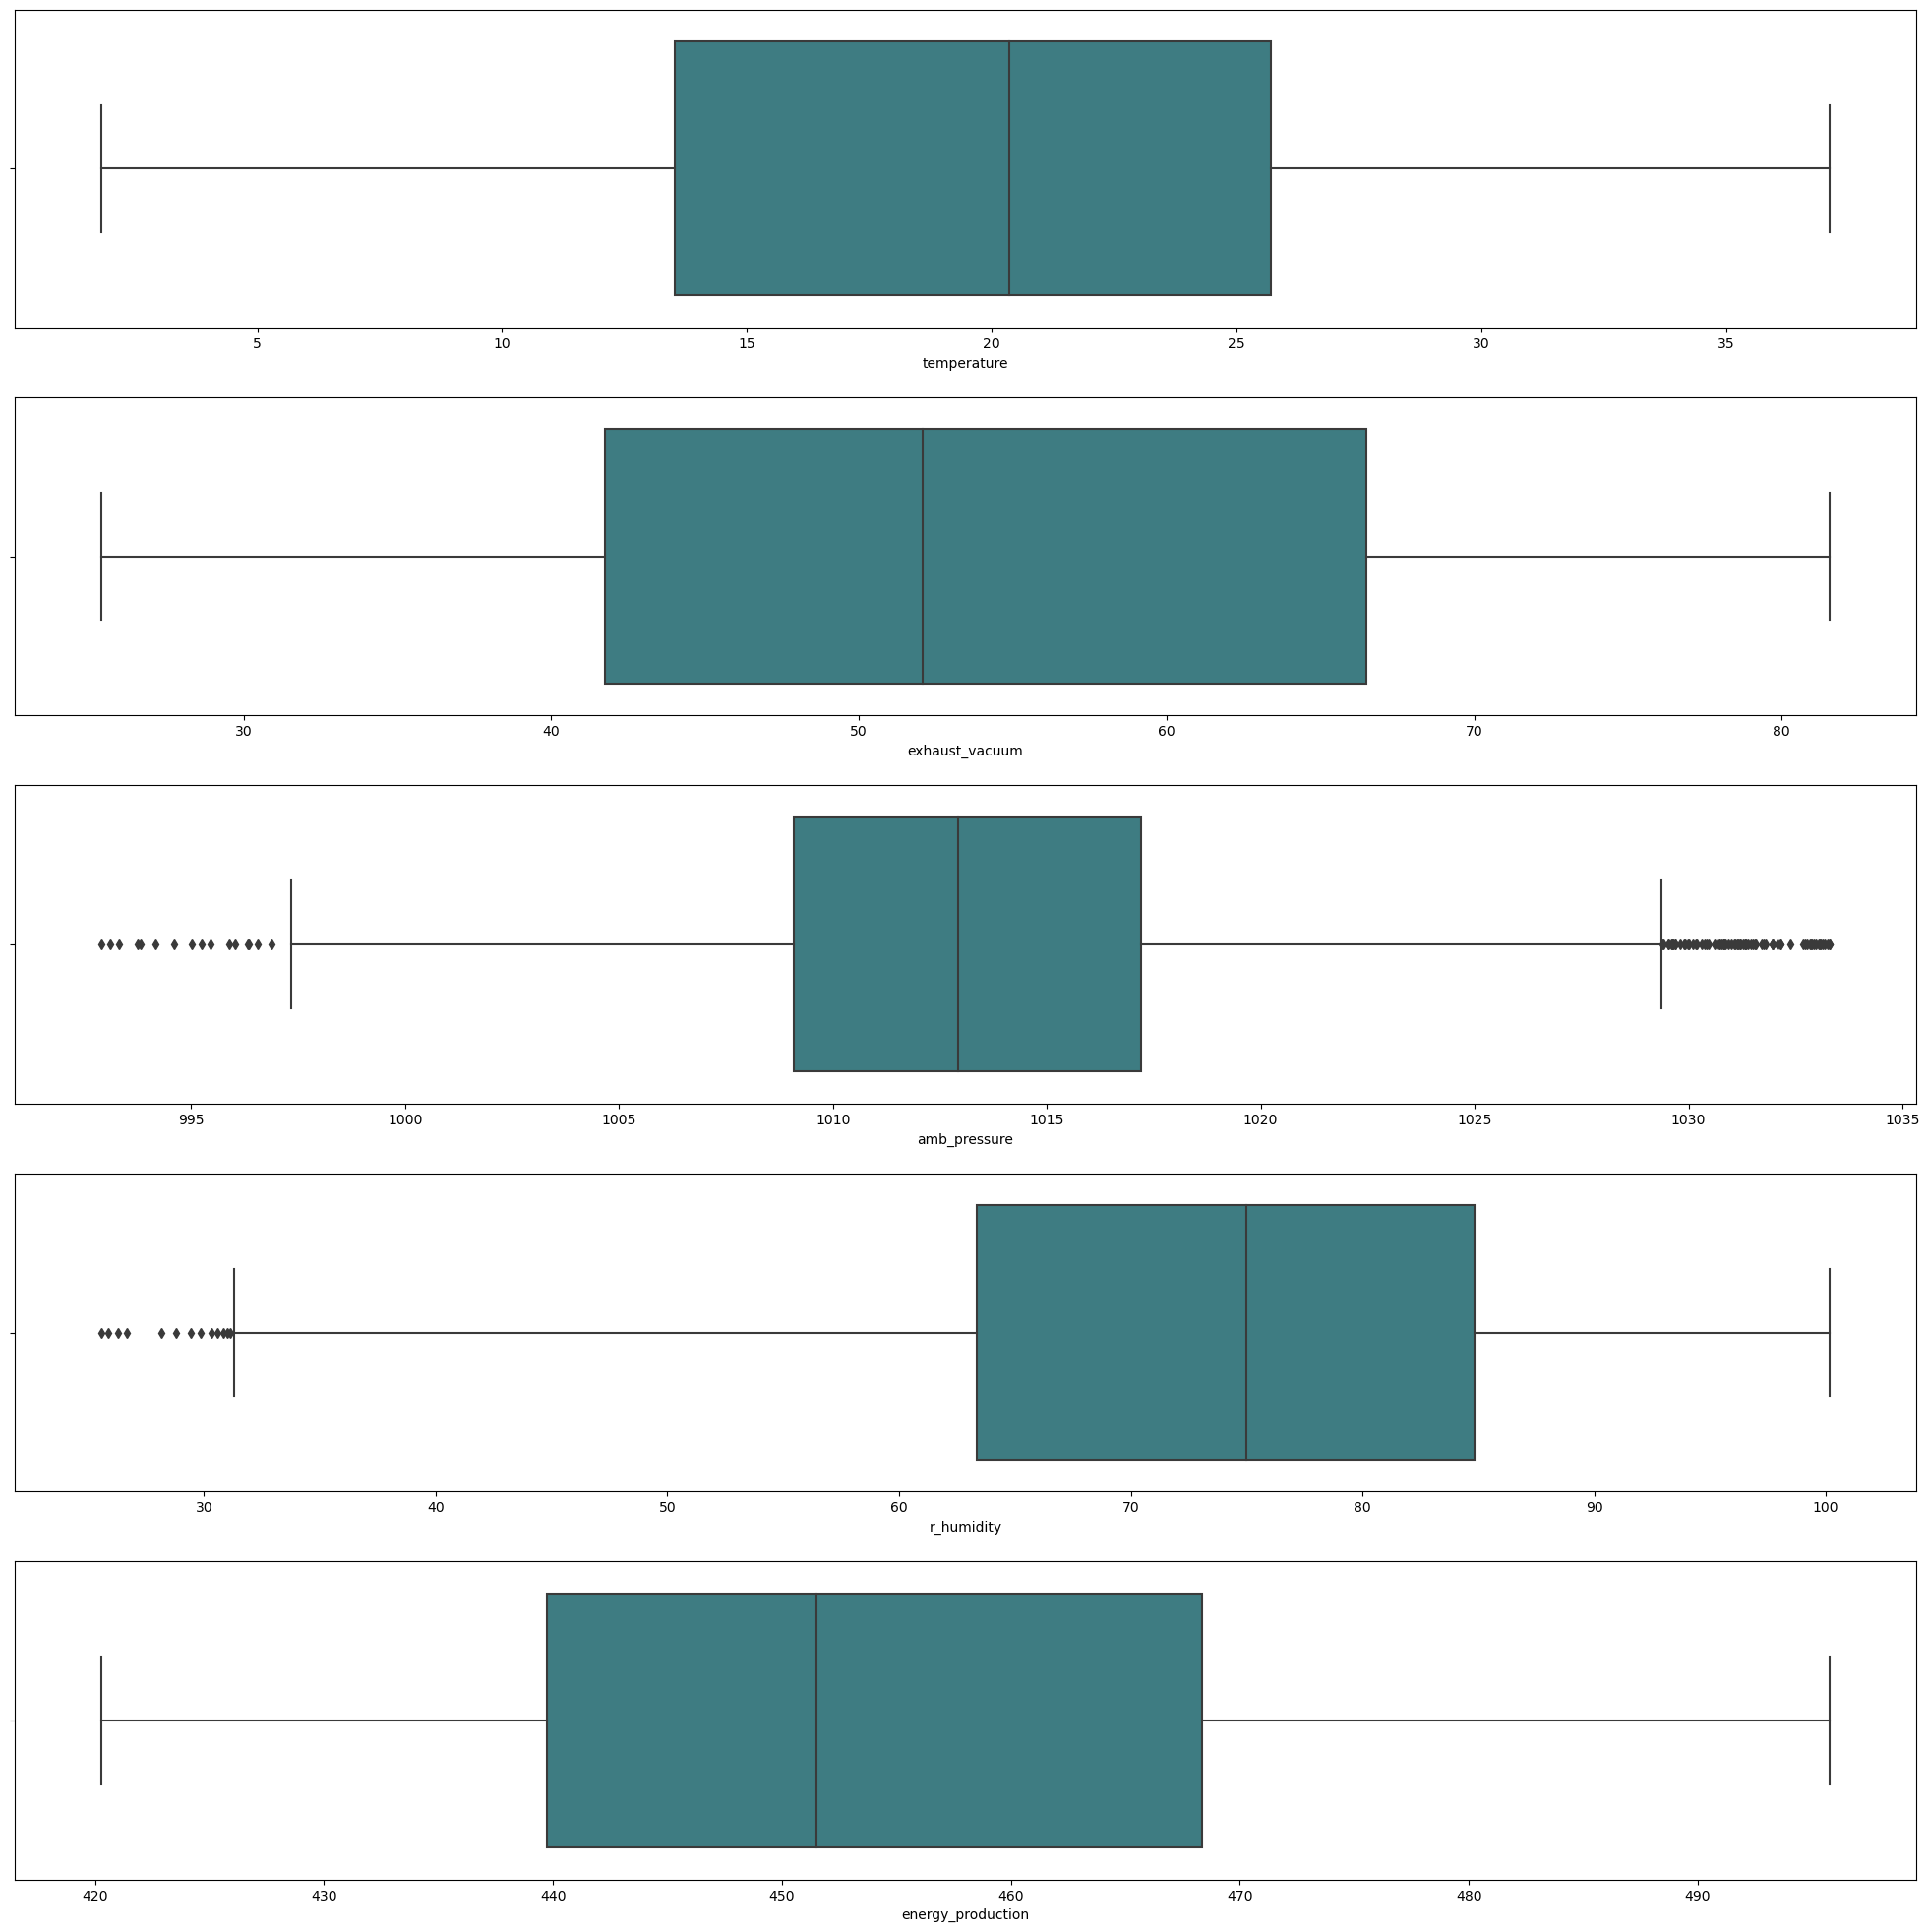

In [19]:
fig, axes=plt.subplots(5,1,figsize=(20,20),sharex=False,sharey=False)
sns.boxplot(x='temperature',data=df,palette='crest',ax=axes[0])
sns.boxplot(x='exhaust_vacuum',data=df,palette='crest',ax=axes[1])
sns.boxplot(x='amb_pressure',data=df,palette='crest',ax=axes[2])
sns.boxplot(x='r_humidity',data=df,palette='crest',ax=axes[3])
sns.boxplot(x='energy_production',data=df,palette='crest',ax=axes[4])
plt.tight_layout(pad=2.0)

In [20]:
def outlier_detection(data, colname):
    q1 = data[colname].quantile(0.25)
    q3 = data[colname].quantile(0.75)
    iqr = q3-q1
    
    upper = q3+1.5*iqr
    lower = q1-1.5*iqr
    
    return lower, upper

In [21]:
outlier_detection(df, "amb_pressure")

(996.9125, 1029.3725)

Text(0.5, 1.0, 'Before the outlier replaced with upper and lower extreme values')

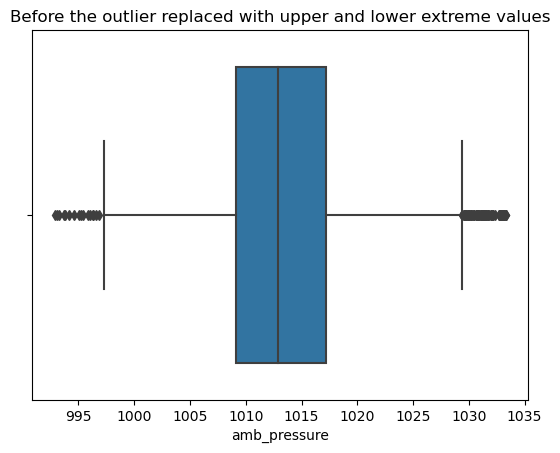

In [22]:
sns.boxplot(x =df["amb_pressure"])
plt.xlabel ("amb_pressure")
plt.title ("Before the outlier replaced with upper and lower extreme values")

In [23]:
df.loc[df["amb_pressure"]>1029.3725, "amb_pressure"] = 1029.3725
df.loc[df["amb_pressure"]<996.9125, "amb_pressure"] = 996.9125

Text(0.5, 1.0, 'After the outlier replaced with upper and lower extreme values')

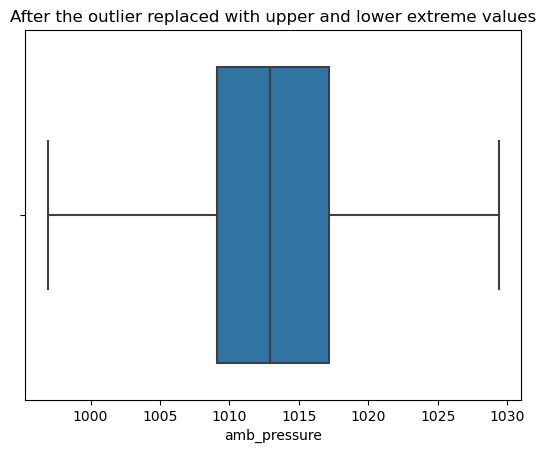

In [24]:
sns.boxplot(x =df["amb_pressure"])
plt.xlabel ("amb_pressure")
plt.title ("After the outlier replaced with upper and lower extreme values")

In [25]:
outlier_detection(df, "r_humidity")

(31.16250000000001, 117.06249999999999)

Text(0.5, 1.0, 'Before the outliers replace with upper and lower extreme values')

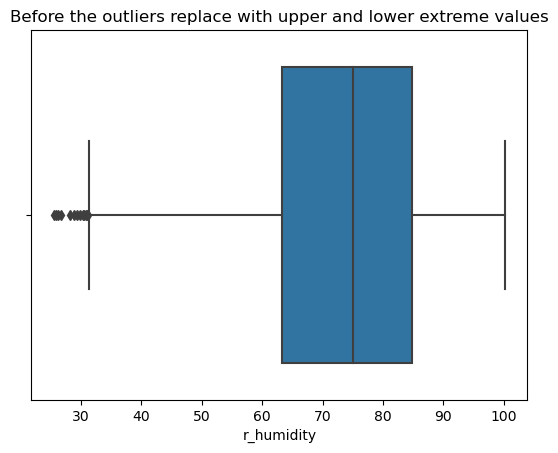

In [26]:
sns.boxplot(x=df["r_humidity"])
plt.xlabel("r_humidity")
plt.title("Before the outliers replace with upper and lower extreme values")

In [27]:
df.loc[df["r_humidity"]<31.16250000000001, "r_humidity"] = 31.16250000000001

Text(0.5, 1.0, 'After replaced the outlier with lower extreme values')

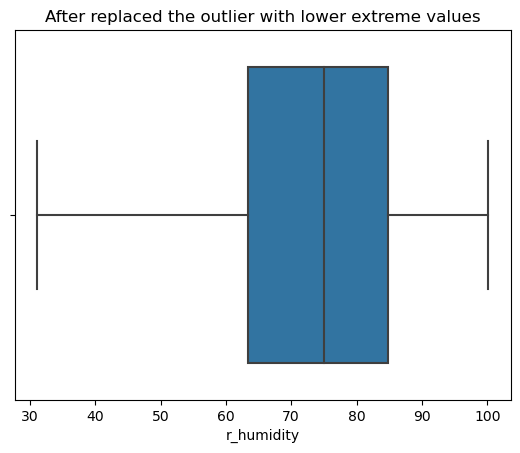

In [28]:
sns.boxplot(x=df["r_humidity"])
plt.xlabel("r_humidity")
plt.title("After replaced the outlier with lower extreme values")

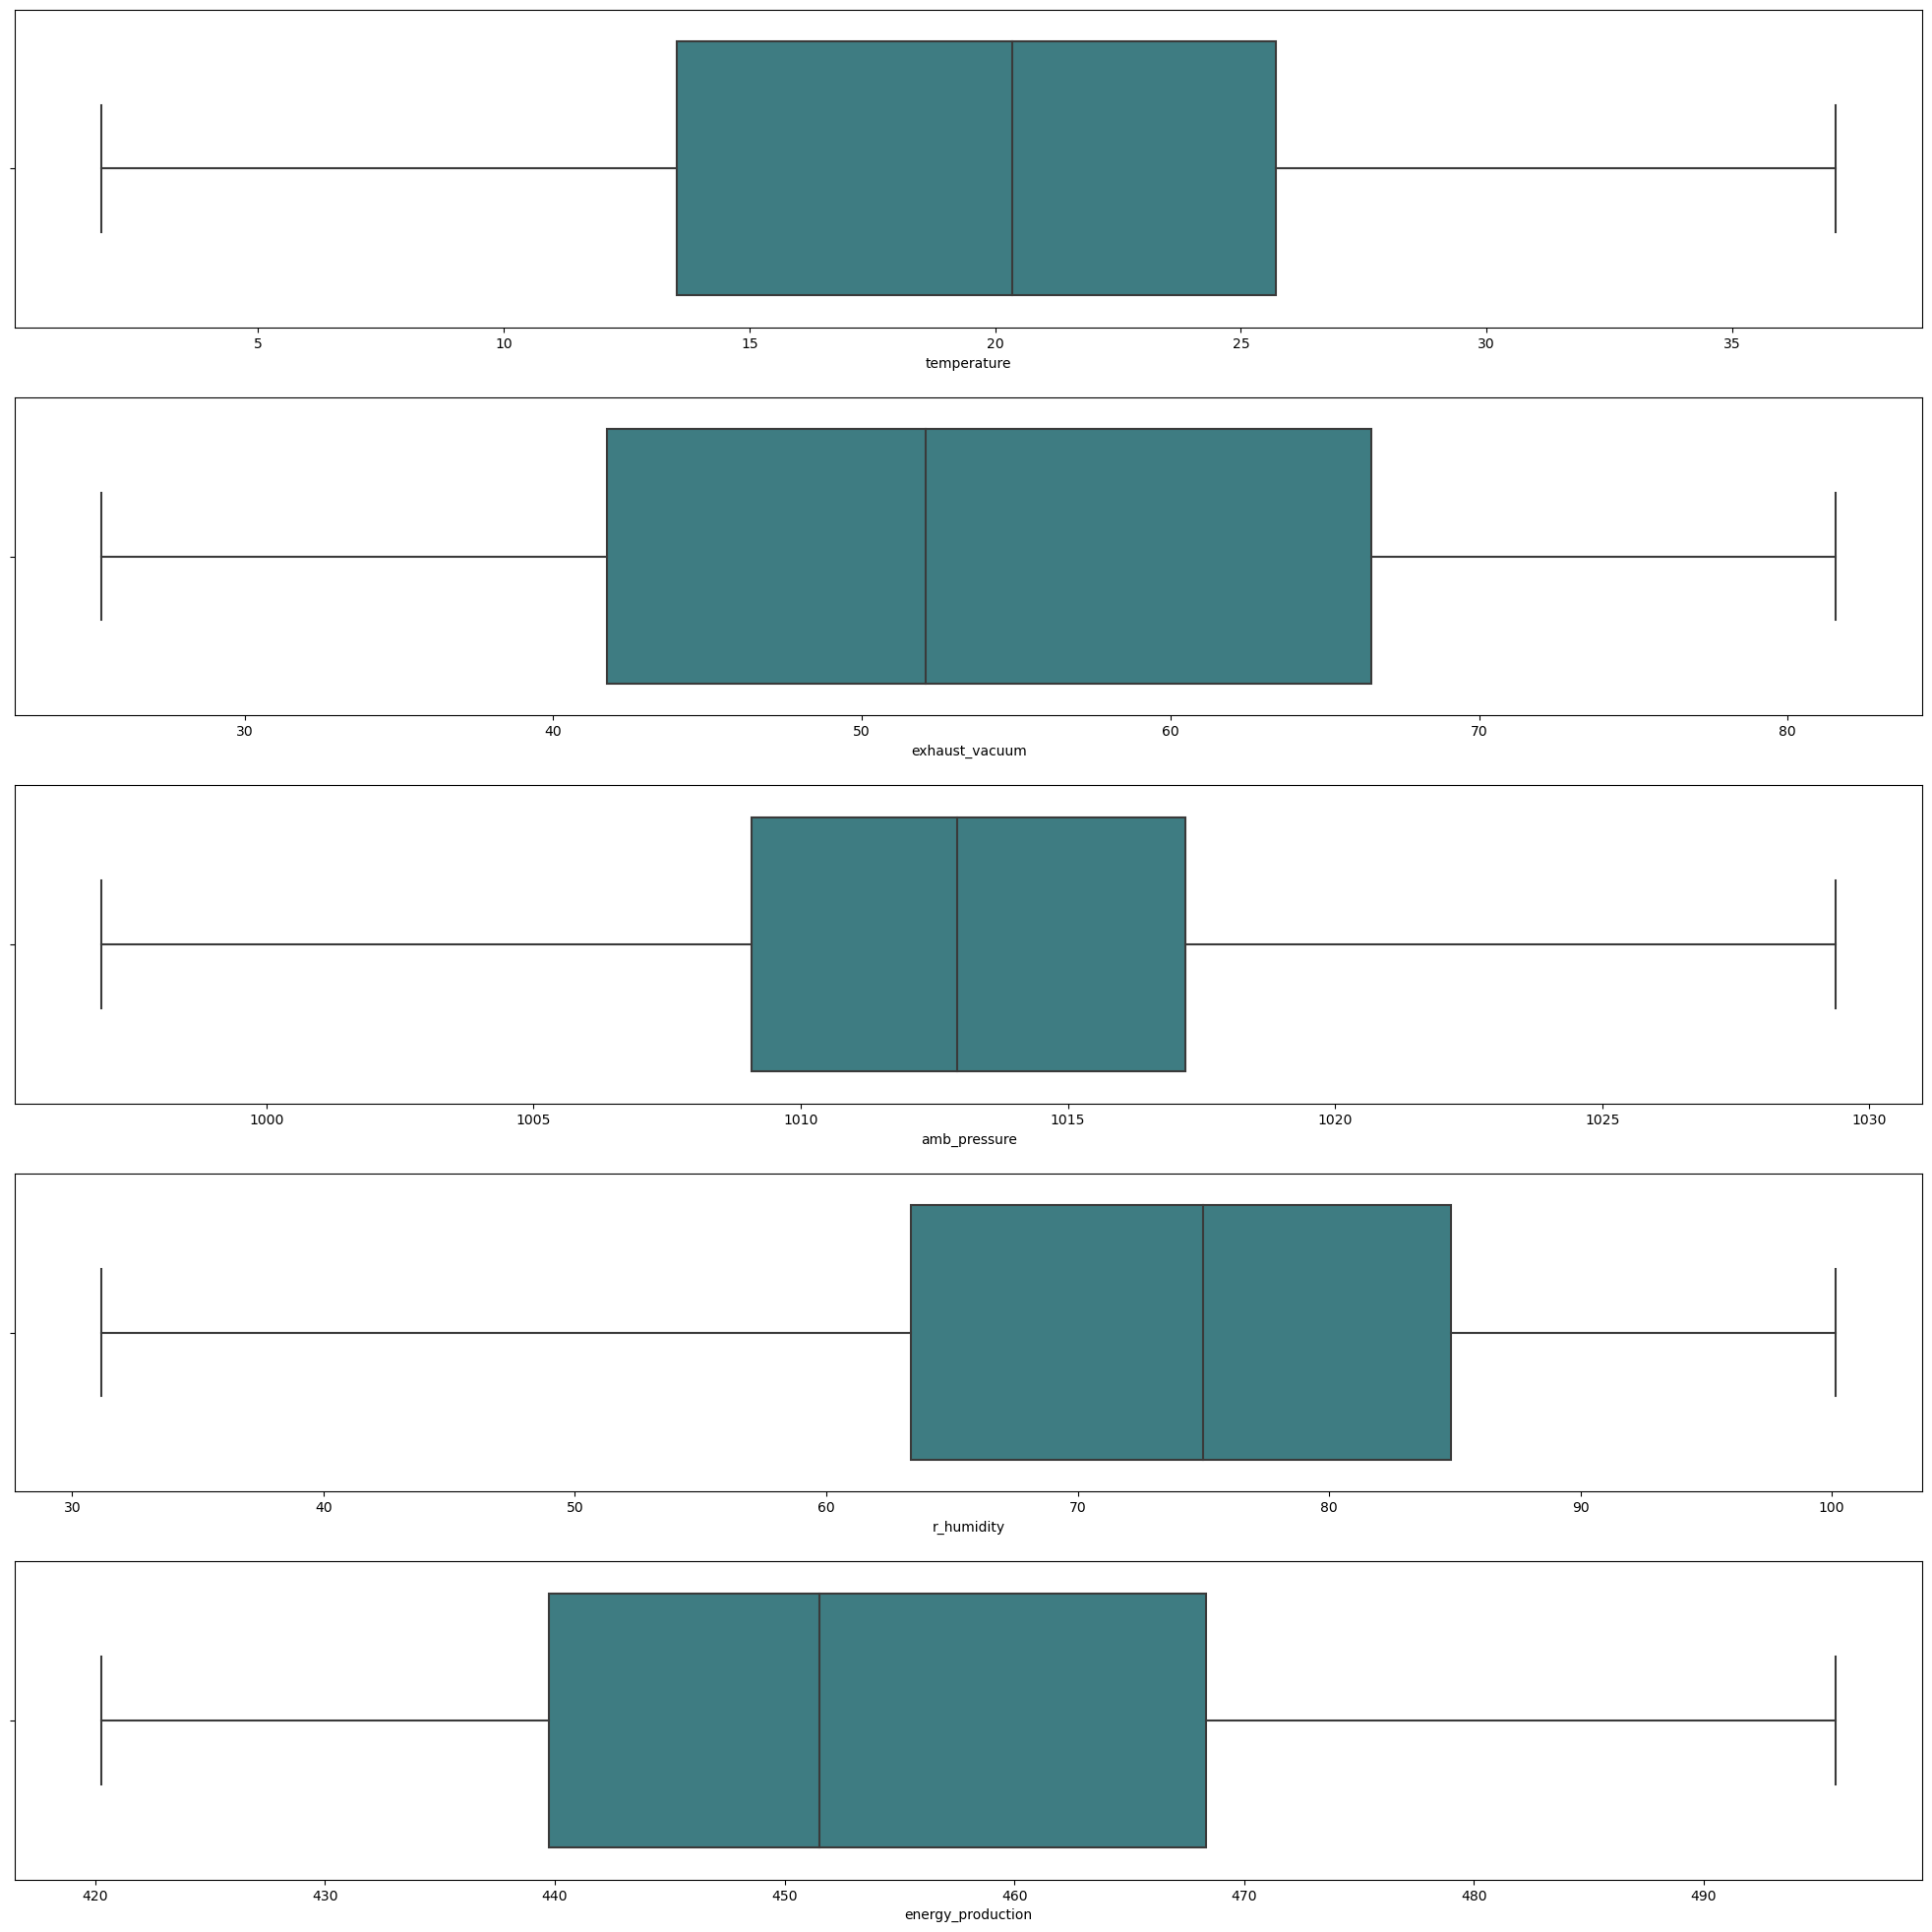

In [29]:
fig, axes=plt.subplots(5,1,figsize=(20,20),sharex=False,sharey=False)
sns.boxplot(x='temperature',data=df,palette='crest',ax=axes[0])
sns.boxplot(x='exhaust_vacuum',data=df,palette='crest',ax=axes[1])
sns.boxplot(x='amb_pressure',data=df,palette='crest',ax=axes[2])
sns.boxplot(x='r_humidity',data=df,palette='crest',ax=axes[3])
sns.boxplot(x='energy_production',data=df,palette='crest',ax=axes[4])
plt.tight_layout(pad=2.0)

### Correlation blw features

In [30]:
df.corr()

,temperature,exhaust_vacuum,amb_pressure,r_humidity,energy_production
temperature,1.000000,0.843689,-0.509968,-0.543946,-0.947908
exhaust_vacuum,0.843689,1.000000,-0.417553,-0.312162,-0.869900
amb_pressure,-0.509968,-0.417553,1.000000,0.102964,0.520663
r_humidity,-0.543946,-0.312162,0.102964,1.000000,0.391166
energy_production,-0.947908,-0.869900,0.520663,0.391166,1.000000


### Inference: As we can see "temperature" & "exhaust_vaccum" have a strong positve Correlation, So can say there is a multicollinearity effect present

<Axes: >

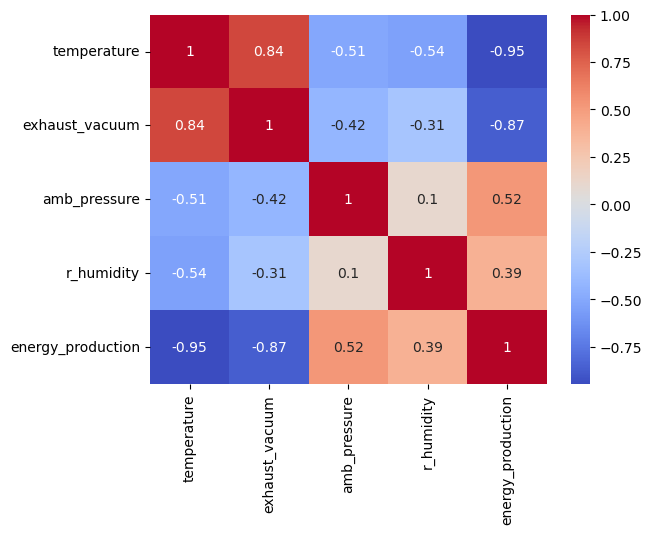

In [31]:
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

### Covariance

In [32]:
df.cov()

,temperature,exhaust_vacuum,amb_pressure,r_humidity,energy_production
temperature,55.419048,79.679570,-22.348359,-59.111654,-120.238023
exhaust_vacuum,79.679570,160.942436,-31.183175,-57.810087,-188.040271
amb_pressure,-22.348359,-31.183175,34.653481,8.848057,52.224735
r_humidity,-59.111654,-57.810087,8.848057,213.096138,97.296067
energy_production,-120.238023,-188.040271,52.224735,97.296067,290.330261


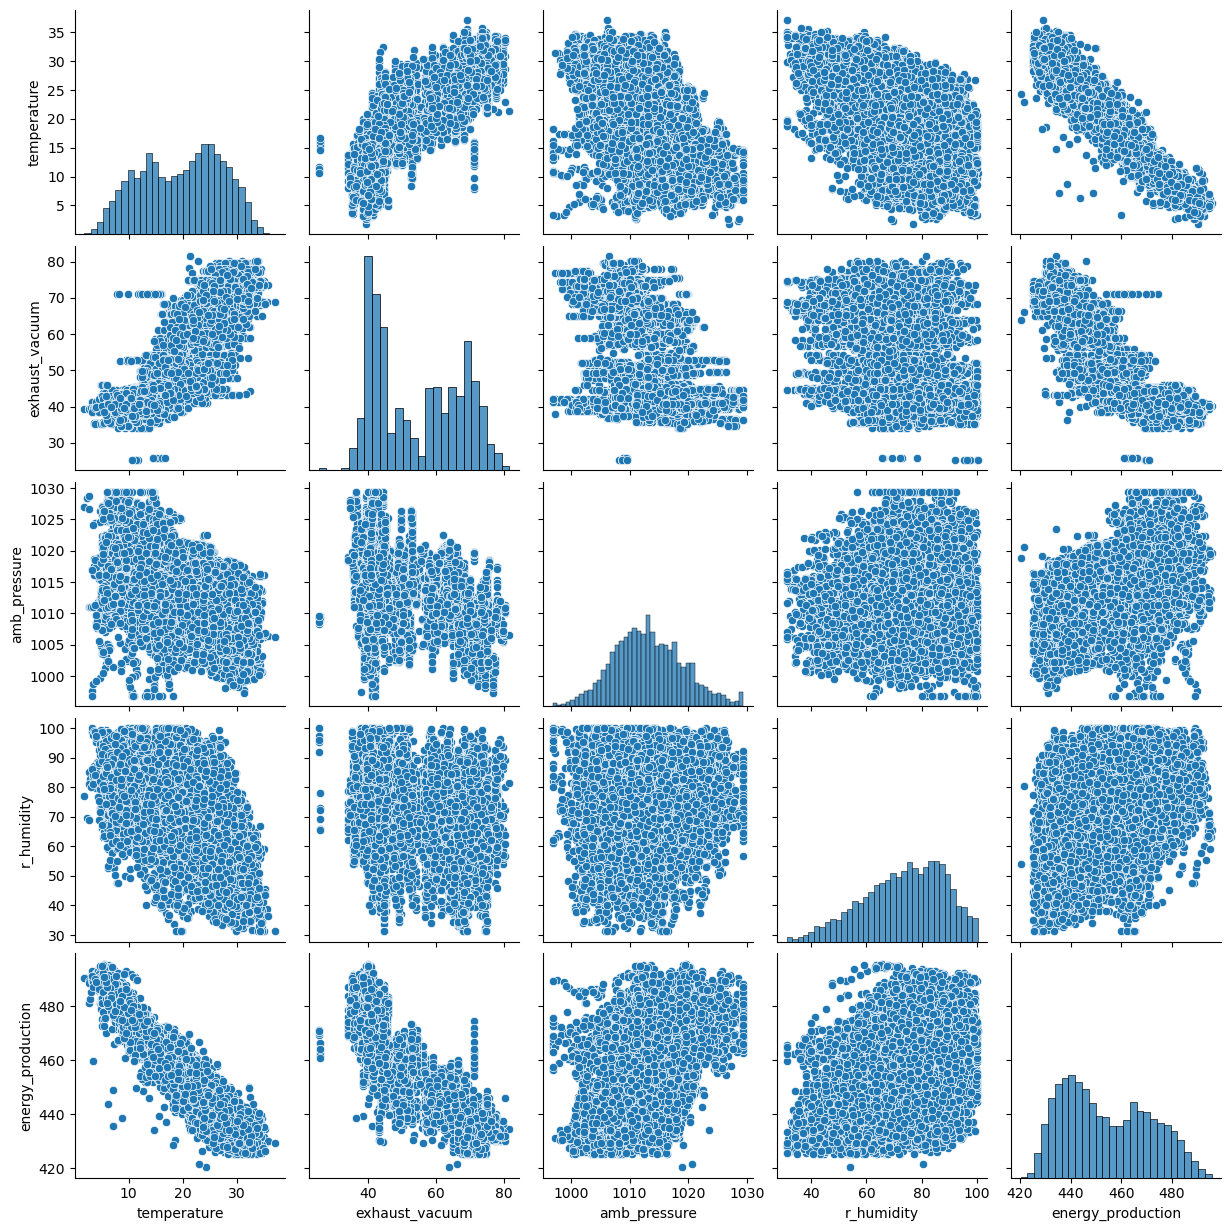

In [33]:
sns.pairplot(df)

### Cross Check with VIF

In [34]:
rsq_Tem = smf.ols('temperature~exhaust_vacuum+amb_pressure+r_humidity',data=df).fit().rsquared  
vif_Tem = 1/(1-rsq_Tem) 

rsq_ex = smf.ols('exhaust_vacuum~temperature+amb_pressure+r_humidity',data=df).fit().rsquared  
vif_ex = 1/(1-rsq_ex) 

rsq_amb = smf.ols('amb_pressure~temperature+exhaust_vacuum+r_humidity',data=df).fit().rsquared  
vif_amb = 1/(1-rsq_amb) 

rsq_rh = smf.ols('r_humidity~temperature+exhaust_vacuum+amb_pressure',data=df).fit().rsquared  
vif_rh = 1/(1-rsq_rh) 

# Storing vif values in a data frame
d1 = {'Variables':['temperature','exhaust_vacuum','amb_pressure','r_humidity'],'VIF':[vif_Tem,vif_ex,vif_amb,vif_rh]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

,Variables,VIF
0,temperature,5.970898
1,exhaust_vacuum,3.934733
2,amb_pressure,1.454801
3,r_humidity,1.709030


#### Inference: There is no Mulit-collinearity between the variables , Since VIF is less then 20.

In [35]:
df

,temperature,exhaust_vacuum,amb_pressure,r_humidity,energy_production
0,9.59,38.56,1017.01,60.10,481.30
1,12.04,42.34,1019.72,94.67,465.36
2,13.87,45.08,1024.42,81.69,465.48
3,13.72,54.30,1017.89,79.08,467.05
4,15.14,49.64,1023.78,75.00,463.58
...,...,...,...,...,...
9563,17.10,49.69,1005.53,81.82,457.32
9564,24.73,65.34,1015.42,52.80,446.92
9565,30.44,56.24,1005.19,56.24,429.34
9566,23.00,66.05,1020.61,80.29,421.57


## MODEL BUILDING

In [36]:
target=df['energy_production']
target

0       481.30
1       465.36
2       465.48
3       467.05
4       463.58
         ...  
9563    457.32
9564    446.92
9565    429.34
9566    421.57
9567    454.41
Name: energy_production, Length: 9527, dtype: float64

In [37]:
features=df.drop('energy_production',axis=1)
features

,temperature,exhaust_vacuum,amb_pressure,r_humidity
0,9.59,38.56,1017.01,60.10
1,12.04,42.34,1019.72,94.67
2,13.87,45.08,1024.42,81.69
3,13.72,54.30,1017.89,79.08
4,15.14,49.64,1023.78,75.00
...,...,...,...,...
9563,17.10,49.69,1005.53,81.82
9564,24.73,65.34,1015.42,52.80
9565,30.44,56.24,1005.19,56.24
9566,23.00,66.05,1020.61,80.29


In [38]:
x_train,x_test,y_train,y_test=train_test_split(features,target,train_size=0.7,random_state=100)

In [39]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(6668, 4)
(6668,)
(2859, 4)
(2859,)


In [40]:
x_train

,temperature,exhaust_vacuum,amb_pressure,r_humidity
8826,21.98,59.39,1015.25,84.52
1908,20.50,49.69,1009.60,70.81
482,22.55,47.45,1008.65,67.90
7118,7.38,41.22,1016.47,96.29
747,27.18,79.05,1008.99,94.32
...,...,...,...,...
350,7.10,41.74,1022.25,91.07
79,22.12,57.19,1007.56,76.50
8068,18.26,61.27,1019.10,74.74
6952,9.17,40.67,1019.03,66.21


In [41]:
y_train

8826    446.79
1908    452.94
482     447.42
7118    485.73
747     434.01
         ...  
350     484.12
79      442.51
8068    428.67
6952    487.33
5650    462.69
Name: energy_production, Length: 6668, dtype: float64

In [42]:
x_test

,temperature,exhaust_vacuum,amb_pressure,r_humidity
5520,14.03,49.83,1006.64,90.01
8947,13.94,41.58,1020.76,68.22
9322,20.84,59.80,1016.96,75.05
6650,26.62,70.36,1005.15,84.99
9455,25.19,63.94,1012.78,75.15
...,...,...,...,...
152,11.36,41.48,1012.80,76.16
2972,6.22,38.68,1017.87,69.41
297,19.46,60.07,1014.81,66.61
6796,23.40,49.16,1002.85,69.82


In [43]:
y_test

5520    463.71
8947    463.07
9322    451.13
6650    441.28
9455    438.73
         ...  
152     465.37
2972    483.55
297     451.89
6796    446.05
4096    440.98
Name: energy_production, Length: 2859, dtype: float64

### Mutli-Linear Regression

In [44]:
mlr=LinearRegression()
mlr.fit(x_train,y_train)

LinearRegression()

In [45]:
MReg_score1=mlr.score(x_train,y_train)
MReg_score2=mlr.score(x_test,y_test)
print(MReg_score1)
print(MReg_score2)

0.9270612246984135
0.9314917096115646


In [46]:
mlr_pred=mlr.predict(x_test)
mlr_pred

array([463.32605403, 469.89360704, 450.72437216, ..., 454.47679314,
       447.9436558 , 446.04318132])

### Decision Tree 

In [47]:
dtr=DecisionTreeRegressor()

In [48]:
dtr.fit(x_train,y_train)

DecisionTreeRegressor()

In [49]:
dtr.score(x_train,y_train),dtr.score(x_test,y_test)

(1.0, 0.9233930214052464)

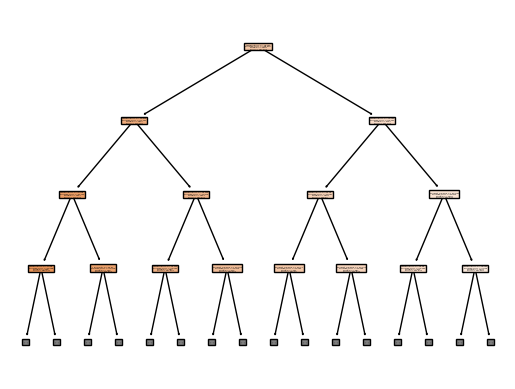

In [50]:
from sklearn.tree import plot_tree
plot_tree(dtr, feature_names=['temperature', 'exhaust_vacuum', 'amb_pressure', 'r_humidity'],max_depth=3, filled=True)
plt.show()

### Validation

In [51]:
params = {
    'criterion' : ['squared_error','absolute_error'],
    'max_depth' : [3,5,7,9,11],
    'splitter' :['best','random']
}

In [52]:
grid = GridSearchCV(estimator=DecisionTreeRegressor(), param_grid=params,
                   verbose=1)

In [53]:
grid.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error'],
                         'max_depth': [3, 5, 7, 9, 11],
                         'splitter': ['best', 'random']},
             verbose=1)

In [54]:
grid.best_params_

{'criterion': 'squared_error', 'max_depth': 7, 'splitter': 'best'}

In [55]:
dtr = DecisionTreeRegressor(criterion='squared_error',
                           max_depth=7,splitter='best')

In [56]:
dtr.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=7)

In [57]:
DT_score1=dtr.score(x_train,y_train)
DT_score2=dtr.score(x_test,y_test)
print(DT_score1)
print(DT_score2)

0.9514972658611434
0.939878608037502


In [58]:
dtr_pred=dtr.predict(x_test)
dtr_pred

array([461.76275862, 466.61277108, 451.2754717 , ..., 451.7498374 ,
       447.43561983, 444.45146341])

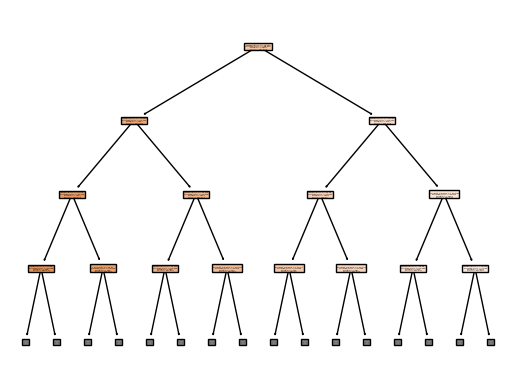

In [59]:
plot_tree(dtr, feature_names=['temperature', 'exhaust_vacuum', 'amb_pressure', 'r_humidity'],max_depth=3, filled=True)
plt.show()

### Support Vector Machine Regressor

In [60]:
svr=SVR()

In [61]:
svr.fit(x_train,y_train)

SVR()

In [62]:
svr.score(x_train,y_train),svr.score(x_test,y_test)

(0.34496879680363424, 0.3468682469648273)

In [63]:
from sklearn.preprocessing import StandardScaler
sca=StandardScaler()
data=sca.fit_transform(features)
data

array([[-1.35252773, -1.24025409,  0.64292836, -0.90690647],
       [-1.02340389, -0.94227944,  1.10331069,  1.46138082],
       [-0.77756852, -0.72628724,  1.90175976,  0.57215985],
       ...,
       [ 1.44838336,  0.15344742, -1.36508611, -1.17134352],
       [ 0.44892156,  0.92676256,  1.25450637,  0.47625003],
       [-0.25634382, -0.39756918,  1.29697706, -0.66233645]])

In [64]:
d_train,d_test,y_train,y_test=train_test_split(data,target,train_size=0.7,random_state=100)

In [65]:
svr=SVR()
svr.fit(d_train,y_train)

SVR()

In [66]:
svr.score(d_train,y_train) , svr.score(d_test,y_test)


(0.9390135077042406, 0.9418497927799446)

In [67]:
svr_pred=svr.predict(x_test)
svr_pred

array([455.93038554, 455.93038554, 455.93038554, ..., 455.93038554,
       455.93038554, 455.93038554])

### Validation

In [68]:
param = {
    'kernel' : ['linear','rbf','poly' "sigmoid'"]
}

In [69]:
grid = GridSearchCV(SVR(), param_grid= param, verbose=1)

In [70]:
grid.fit(d_train,y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


GridSearchCV(estimator=SVR(),
             param_grid={'kernel': ['linear', 'rbf', "polysigmoid'"]},
             verbose=1)

In [71]:
grid.best_params_

{'kernel': 'rbf'}

In [72]:
svr=SVR(kernel='rbf')
svr.fit(d_train,y_train)

SVR()

In [73]:
SVR_score1=svr.score(d_train,y_train)
SVR_score2=svr.score(d_test,y_test)
print(SVR_score1)
print(SVR_score2)

0.9390135077042406
0.9418497927799446


### Random Forest Regressor

In [74]:
rfr=RandomForestRegressor(n_estimators=50,bootstrap=True)

In [75]:
rfr.fit(x_train,y_train)

RandomForestRegressor(n_estimators=50)

In [76]:
RF_score1=rfr.score(x_train,y_train)
print(RF_score1)
RF_score2=rfr.score(x_test,y_test)
print(RF_score2)

0.9939842305199627
0.9619564052794218


In [77]:
rfr_pred=rfr.predict(x_test)
rfr_pred

array([463.724 , 465.1866, 448.9866, ..., 454.0062, 442.2992, 442.7714])

In [78]:
abr=AdaBoostRegressor(n_estimators=50)
abr.fit(x_train,y_train)

AdaBoostRegressor()

### AdaBoost

In [79]:
ADA_score1=abr.score(x_train,y_train)
print(ADA_score1)
ADA_score2=abr.score(x_test,y_test)
print(ADA_score2)

0.8953412609978374
0.8973034789348409


In [80]:
xgb=XGBRegressor(n_estimators=50)
xgb.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=50, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

### XGB 

In [81]:
XGB_score1=xgb.score(x_train,y_train)
print(XGB_score1)
XGB_score2=xgb.score(x_test,y_test)
print(XGB_score2)

0.9802156186592026
0.9663679446792746


In [82]:
knn=KNeighborsRegressor(n_neighbors=5)
knn.fit(x_train,y_train)

KNeighborsRegressor()

### KNN

In [83]:
KNN_score1=knn.score(x_train,y_train)
print(KNN_score1)
KNN_score2=knn.score(x_test,y_test)
print(KNN_score2)

0.9626903496976189
0.9482271720302842


### Train & Test Scores of Each Model

In [84]:
scores=pd.DataFrame({'Models':['MultiLinear Regressor','Decision Tree Regressor','Support Vector Machine Regressor','Random Forest Regressor','AdaBoost Regressor','XGB Regressor' ,'KNN'],
                     'Train_Scores':[MReg_score1,DT_score1,SVR_score1,RF_score1,ADA_score1,XGB_score1,KNN_score1],
                     'Test_Scores':[MReg_score2,DT_score2,SVR_score2,RF_score2,ADA_score2,XGB_score2,KNN_score2]})
scores

,Models,Train_Scores,Test_Scores
0,MultiLinear Regressor,0.927061,0.931492
1,Decision Tree Regressor,0.951497,0.939879
2,Support Vector Machine Regressor,0.939014,0.941850
3,Random Forest Regressor,0.993984,0.961956
4,AdaBoost Regressor,0.895341,0.897303
5,XGB Regressor,0.980216,0.966368
6,KNN,0.962690,0.948227


### MODEL EVALUATION

In [86]:
def find_best_model_using_gridsearchcv(x, y):
    algos = {
        'multi-linear_regression': {
            'model': LinearRegression(),
            'params': {}
        },
        'ridge': {
            'model': Ridge(),
            'params': {'alpha': [0.1, 0.5, 1]}
        },
        'lasso': {
            'model': Lasso(),
            'params': {'alpha': [0.1, 0.5, 1], 'selection': ['random', 'cyclic']}
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {'criterion': ['squared_error', 'friedman_mse'], 'splitter': ['best', 'random']}
        },
        'Random Forest': {
            'model': RandomForestRegressor(),
            'params': {'n_estimators': [100, 125, 150, 200], 'max_features': [3, 4]}
        },
        'XGBoost': {
            'model': XGBRegressor(),
            'params': {'n_estimators': [100, 125, 150, 200, 225, 250], 'max_depth': [3, 4, 5], 'learning_rate': [0.1, 0.2]}
        },
        'SVM': {
            'model': SVR(),
            'params': {'kernel': ['rbf']}
        },
        'KNN': {
            'model': KNeighborsRegressor(),
            'params': {'n_neighbors': [5, 10, 15, 20, 25, 30, 35, 40, 45, 50]}
        }
    }
    
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=10)
    
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv)
        gs.fit(x, y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])

# Assuming x_train and y_train are defined
find_best_model_using_gridsearchcv(x_train, y_train)


,model,best_score,best_params
0,multi-linear_regression,0.928258,{}
1,ridge,0.928258,{'alpha': 0.1}
2,lasso,0.928241,"{'alpha': 0.1, 'selection': 'cyclic'}"
3,decision_tree,0.923140,"{'criterion': 'squared_error', 'splitter': 'be..."
4,Random Forest,0.957365,"{'max_features': 3, 'n_estimators': 200}"
5,XGBoost,0.960249,"{'learning_rate': 0.2, 'max_depth': 5, 'n_esti..."
6,SVM,0.283282,{'kernel': 'rbf'}
7,KNN,0.939711,{'n_neighbors': 5}


### Best Model -----> XGB Regressor

In [88]:
xgb_model = XGBRegressor(n_estimators=250,learning_rate=0.2, max_depth=5)
xgb_model.fit(x_train,y_train)
xgb_model.score(x_test,y_test)*100

96.91621025839123

### pickling 

In [90]:
import pickle
pickle_out = open('xgb_model.pkl','wb')
pickle.dump(xgb_model,pickle_out)
pickle_out.close()